#Plotting Sigmoid Function

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [2]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [3]:
sigmoid(x = 1, w = 0.5, b = 0)

0.6224593312018546

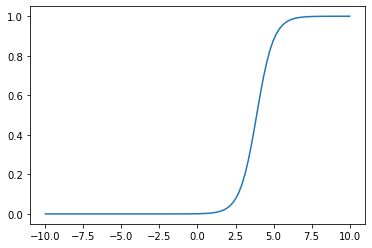

In [7]:
w = 1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -7  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [8]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [9]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [19]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [20]:
# X1 = np.linspace(-10, 10, 5)
# X2 = np.linspace(-10, 10, 5)

# XX1, XX2 = np.meshgrid(X1, X2)

# print(X1.shape, X2.shape, XX1.shape, XX2.shape)

In [21]:
print(X1)

[-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4.94949495
   5.151515

In [22]:
print(XX1)

[[-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 ...
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]]


In [27]:
w1 = -2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [28]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

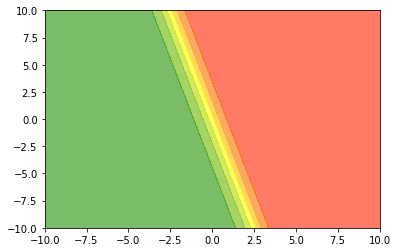

In [29]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

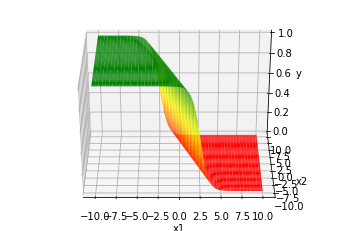

In [30]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap=my_cmap)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [31]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

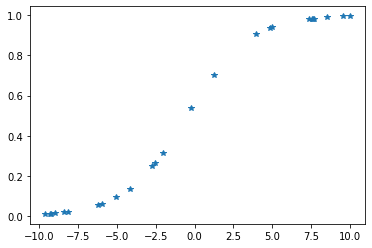

In [32]:
plt.plot(X, Y, '*')
plt.show()

In [33]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [34]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [35]:
WW.shape

(101, 101)

In [36]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

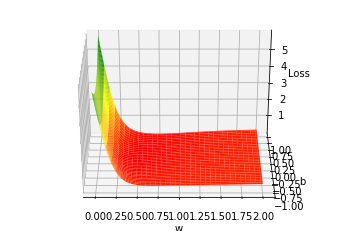

In [38]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap=my_cmap)
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [39]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [40]:
print(i, j)

62 25


In [41]:
print(WW[i, j], BB[i, j])

0.5 0.24


# Class for Sigmoid Neuron

In [42]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y)_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * y
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [47]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [48]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

100%|██████████| 1/1 [00:00<00:00, 1092.84epoch/s]


In [63]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

In [59]:
# ax.contourf?

In [60]:
# X1 = np.linspace(-10, 10, 10)
# X2 = np.linspace(-10, 10, 10)
# XX1, XX2 = np.meshgrid(X1, X2)

In [61]:
# XX1

100%|██████████| 1/1 [00:00<00:00, 1928.42epoch/s]


[[1.06395172 1.31936359]] [-0.00052314]


100%|██████████| 1/1 [00:00<00:00, 1159.93epoch/s]


[[1.11394064 1.27272584]] [-0.00524581]


100%|██████████| 1/1 [00:00<00:00, 1737.49epoch/s]


[[1.15330089 1.22370964]] [-0.00518594]


100%|██████████| 1/1 [00:00<00:00, 1204.57epoch/s]


[[1.18690062 1.16876458]] [-0.00096399]


100%|██████████| 1/1 [00:00<00:00, 2159.79epoch/s]


[[1.21774011 1.10380147]] [0.00760888]


100%|██████████| 1/1 [00:00<00:00, 2514.57epoch/s]


[[1.24839626 1.0226676 ]] [0.02151141]


100%|██████████| 1/1 [00:00<00:00, 2035.08epoch/s]


[[1.28203711 0.91452005]] [0.04294332]


100%|██████████| 1/1 [00:00<00:00, 2352.39epoch/s]


[[1.3238125  0.75819799]] [0.07642319]


100%|██████████| 1/1 [00:00<00:00, 3017.48epoch/s]


[[1.38205494 0.51425324]] [0.12975796]


100%|██████████| 1/1 [00:00<00:00, 2585.88epoch/s]


[[1.44937913 0.17962262]] [0.1947434]


100%|██████████| 1/1 [00:00<00:00, 3223.91epoch/s]


[[ 1.44864349 -0.09055357]] [0.19167301]


100%|██████████| 1/1 [00:00<00:00, 1429.55epoch/s]


[[ 1.39443551 -0.44379738]] [0.12605024]


100%|██████████| 1/1 [00:00<00:00, 642.21epoch/s]


[[ 1.4252161  -0.50342788]] [0.06230977]


100%|██████████| 1/1 [00:00<00:00, 1509.83epoch/s]


[[ 1.47676168 -0.48801305]] [0.00647179]


100%|██████████| 1/1 [00:00<00:00, 1877.49epoch/s]


[[ 1.50958116 -0.5157374 ]] [-0.04473009]


100%|██████████| 1/1 [00:00<00:00, 1889.33epoch/s]


[[ 1.54723974 -0.51928199]] [-0.09079423]


100%|██████████| 1/1 [00:00<00:00, 1117.88epoch/s]


[[ 1.57863601 -0.53255596]] [-0.13305896]


100%|██████████| 1/1 [00:00<00:00, 1576.81epoch/s]


[[ 1.60911458 -0.54107687]] [-0.17177166]


100%|██████████| 1/1 [00:00<00:00, 1755.67epoch/s]


[[ 1.63714169 -0.55024476]] [-0.20748916]


100%|██████████| 1/1 [00:00<00:00, 3182.32epoch/s]


[[ 1.66350785 -0.55852973]] [-0.24055097]


100%|██████████| 1/1 [00:00<00:00, 2874.78epoch/s]


[[ 1.68828155 -0.56638241]] [-0.27128004]


100%|██████████| 1/1 [00:00<00:00, 1858.35epoch/s]


[[ 1.71165909 -0.57378335]] [-0.29994119]


100%|██████████| 1/1 [00:00<00:00, 2837.82epoch/s]


[[ 1.73378314 -0.58078804]] [-0.32676149]


100%|██████████| 1/1 [00:00<00:00, 2651.27epoch/s]


[[ 1.75477932 -0.58743493]] [-0.35193517]


100%|██████████| 1/1 [00:00<00:00, 1815.72epoch/s]


[[ 1.77475572 -0.59375809]] [-0.37562941]


100%|██████████| 1/1 [00:00<00:00, 2289.47epoch/s]


[[ 1.79380612 -0.59978715]] [-0.39798884]


100%|██████████| 1/1 [00:00<00:00, 2870.84epoch/s]


[[ 1.81201233 -0.60554799]] [-0.41913923]


100%|██████████| 1/1 [00:00<00:00, 2290.72epoch/s]


[[ 1.82944602 -0.61106335]] [-0.43919047]


100%|██████████| 1/1 [00:00<00:00, 1473.24epoch/s]


[[ 1.84617032 -0.61635327]] [-0.45823896]


100%|██████████| 1/1 [00:00<00:00, 2018.43epoch/s]


[[ 1.86224105 -0.62143552]] [-0.47636972]


100%|██████████| 1/1 [00:00<00:00, 2563.76epoch/s]


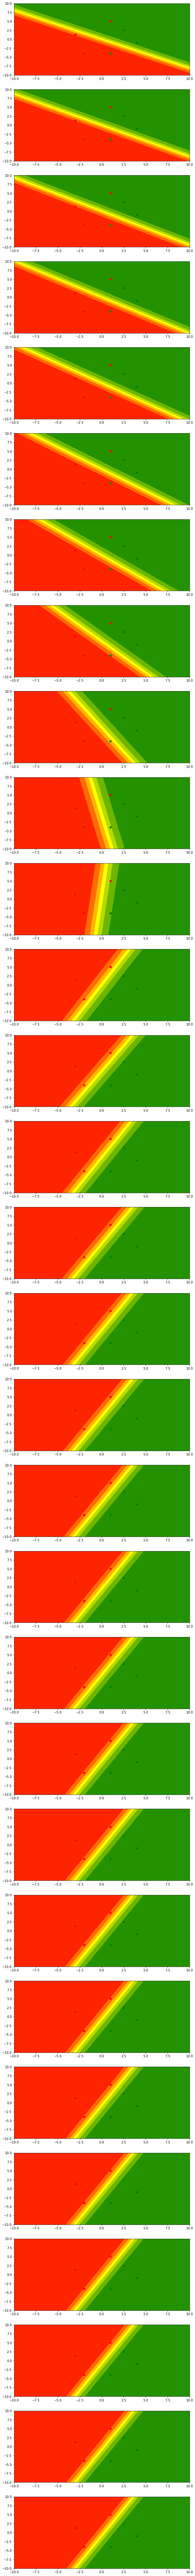

In [62]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# Load Data

In [ ]:
# !wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

--2019-02-26 05:17:04--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/739uo8ebwbic9kb/mobile_cleaned.csv [following]
--2019-02-26 05:17:04--  https://www.dropbox.com/s/raw/739uo8ebwbic9kb/mobile_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc13fb77f6fedcc765e931955638.dl.dropboxusercontent.com/cd/0/inline/AcD4vBR7BLdCbPKdJyoO-EIk-ZrDbRMA-eaLOv-O_u47wr5y5geXCk4afOKzW52HB1bodEutwYs10tKp7_lxEeploLsXxt3kitfZXATc4EM_bIVfp9U6hI0W0MSs6_rC-bY/file# [following]
--2019-02-26 05:17:04--  https://uc13fb77f6fedcc765e931955638.dl.dropboxusercontent.com/cd/0/inline/AcD4vBR7BLdCbPKdJyoO-EIk-ZrDbRMA-eaLOv-O_u47wr5y5geXCk4afOKzW52HB1bodEutwYs10tKp7_lxEeploLsXxt3k

In [ ]:
# !ls

mobile_cleaned.csv  mobile_cleaned.csv.1  sample_data


In [64]:
data = pd.read_csv('mobile_cleaned.csv')

In [65]:
data.head()

PhoneId  Pixel Density  Screen Size  Weight  RAM  Processor_frequency  \
0        0            403         6.26     182    4                  1.8   
1        1            271         6.20     168    3                  1.8   
2        2            409         6.30     168    3                  2.1   
3        4            411         6.00     169    4                  2.2   
4        5            396         6.50     175    4                  2.2   

   Screen to Body Ratio (calculated)  Height  Internal Memory  Capacity  ...  \
0                              80.68   157.9               64      4000  ...   
1                              80.85   156.2               32      4230  ...   
2                              83.68   157.0               32      3500  ...   
3                              74.78   159.8               64      3300  ...   
4                              84.23   160.4               64      3750  ...   

   os_name_Tizen  os_name_iOS  SIM Slot(s)_Dual SIM, GSM+CDMA  \
0              0            0                               0   
1              0            0                               0   
2              0            0                               0   
3              0            0                               0   
4              0            0                               0   

   SIM Slot(s)_Dual SIM, GSM+GSM  SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE  \
0                              0                                          1   
1                              0                                          1   
2                              0                                          1   
3                              1                                          0   
4                              0                                          1   

   SIM Slot(s)_Single SIM, GSM  Sim1_2G  Sim1_3G  Sim1_4G  Rating  
0                            0        0        0        1     4.5  
1                            0        0        0        1     4.5  
2                            0        0        0        1     4.4  
3                            0        0        0        1     4.3  
4                            0        0        0        1     4.4  

[5 rows x 88 columns]

In [66]:
data.shape

(341, 88)

In [67]:
X = data.drop('Rating', axis=1)

In [68]:
Y = data['Rating'].values

In [69]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [70]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [71]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [72]:
Y_binarised = data['Class'].values

## Standardisation

In [73]:
R = np.random.random([100, 1])

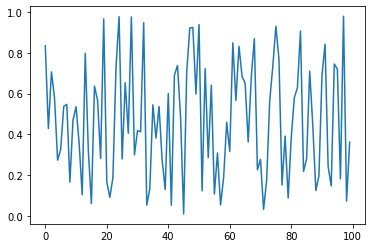

In [74]:
plt.plot(R)
plt.show()

In [75]:
np.mean(R)

0.47238172065735173

In [76]:
np.std(R)

0.28162344874154294

In [77]:
scaler = StandardScaler()

In [78]:
scaler.fit(R)

StandardScaler()

In [79]:
scaler.mean_

array([0.47238172])

In [80]:
RT = scaler.transform(R)

In [81]:
np.mean(RT)

9.992007221626408e-18

In [82]:
np.std(RT)

1.0

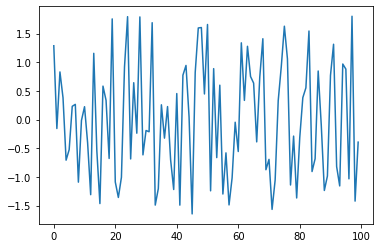

In [83]:
plt.plot(RT)
plt.show()

In [84]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [85]:
print(X_train.shape, X_test.shape)

(255, 87) (86, 87)


In [86]:
scaler = StandardScaler()

In [87]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [88]:
minmax_scaler = MinMaxScaler()

In [89]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [90]:
np.min(Y_scaled_train)

0.0

In [91]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [92]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [93]:
scaled_threshold

0.6800000000000002

In [94]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [95]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

# Train on Real Data

In [96]:
sn = SigmoidNeuron()

In [98]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss=False)

100%|██████████| 2000/2000 [00:16<00:00, 121.10epoch/s]


In [ ]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [ ]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [ ]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [ ]:
print(accuracy_train, accuracy_test)

0.7803921568627451 0.7209302325581395
